Лучшее значение K: 6
Лучшее значение R2 на кросс-валидации: 0.6087573613169451
R2 на тестовой выборке: 0.26044579061820383


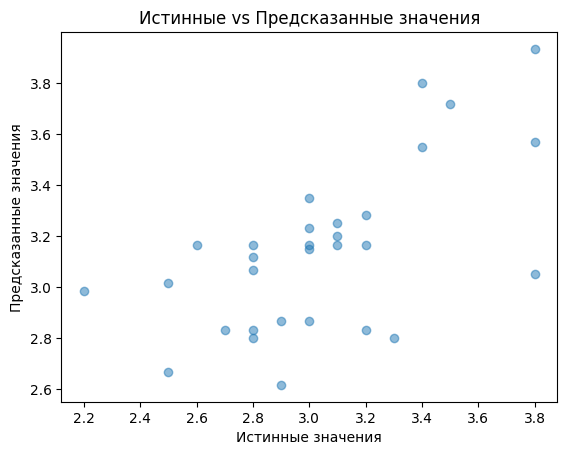

In [4]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import r2_score
import numpy as np
import pandas as pd

# Загрузка данных
df = pd.read_csv(r"C:\Users\swer\Downloads\Iris.csv")

# Удаление ненужных столбцов (Id и Species, так как они не нужны для регрессии)
X = df.drop(columns=['Id', 'SepalWidthCm', 'Species'])  # Признаки — все, кроме целевой переменной и категорий
y = df['SepalWidthCm']  # Целевая переменная — ширина чашелистика

# Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Создание модели KNN для регрессии
knn = KNeighborsRegressor()

# Определение диапазона значений K для проверки
param_grid = {'kneighborsregressor__n_neighbors': range(1, 21)}

# Создание пайплайна, который сначала стандартизирует данные, а затем применяет KNN
pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Стандартизация данных
    ('kneighborsregressor', knn)   # Модель KNN
])

# Настройка GridSearchCV для поиска оптимального K
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='r2')
grid_search.fit(X_train, y_train)

# Получение лучшего значения K и оценка модели
best_k = grid_search.best_params_['kneighborsregressor__n_neighbors']
print(f"Лучшее значение K: {best_k}")
print(f"Лучшее значение R2 на кросс-валидации: {grid_search.best_score_}")

# Оценка на тестовой выборке
y_pred = grid_search.predict(X_test)
print(f"R2 на тестовой выборке: {r2_score(y_test, y_pred)}")

# Визуализация предсказанных и истинных значений
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel('Истинные значения')
plt.ylabel('Предсказанные значения')
plt.title('Истинные vs Предсказанные значения')
plt.show()


R2 на тестовой выборке для Ridge регрессии: 0.4336248451762871


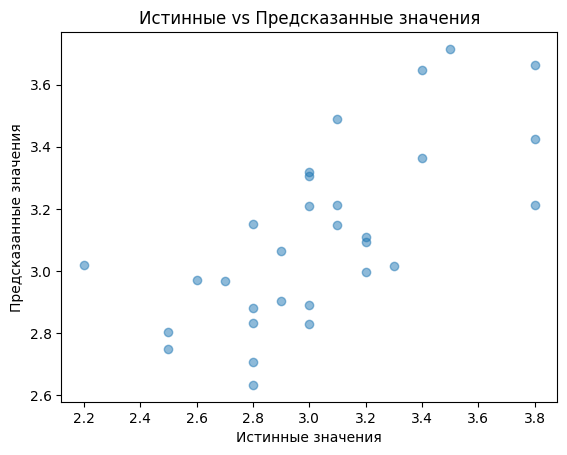

In [5]:
from sklearn.linear_model import Ridge

model = Ridge(alpha=1.0)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(f"R2 на тестовой выборке для Ridge регрессии: {r2_score(y_test, y_pred)}")

import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel('Истинные значения')
plt.ylabel('Предсказанные значения')
plt.title('Истинные vs Предсказанные значения')
plt.show()


R2 на тестовой выборке с полиномиальными признаками: -62.503236951556005


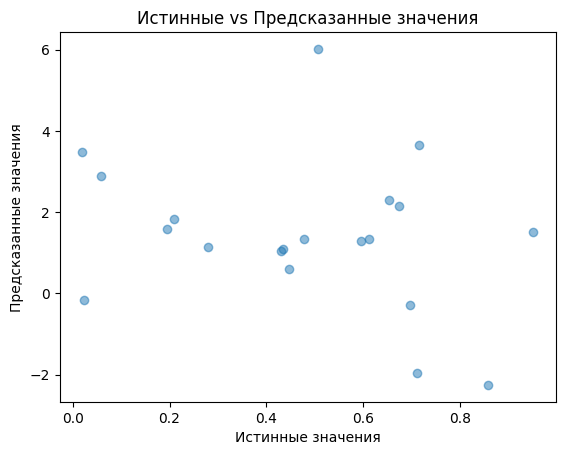

In [33]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline

poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X_train)

model = LinearRegression()
model.fit(X_poly, y_train)
y_pred = model.predict(poly.transform(X_test))
print(f"R2 на тестовой выборке с полиномиальными признаками: {r2_score(y_test, y_pred)}")

import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel('Истинные значения')
plt.ylabel('Предсказанные значения')
plt.title('Истинные vs Предсказанные значения')
plt.show()

R2 на тестовой выборке для случайного леса: -0.45121438904222555


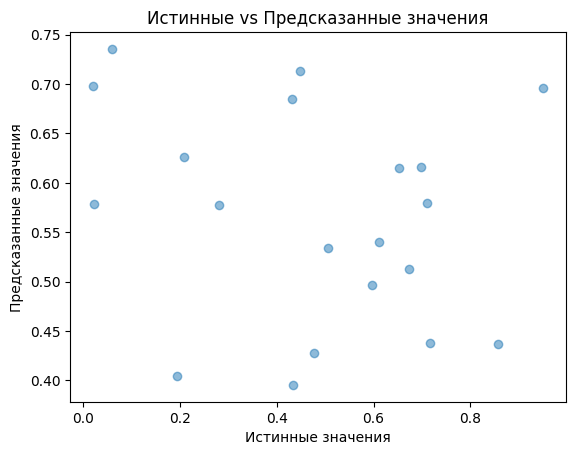

In [32]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(f"R2 на тестовой выборке для случайного леса: {r2_score(y_test, y_pred)}")

import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel('Истинные значения')
plt.ylabel('Предсказанные значения')
plt.title('Истинные vs Предсказанные значения')
plt.show()

R2 на тестовой выборке для градиентного бустинга: -0.7559490120639947


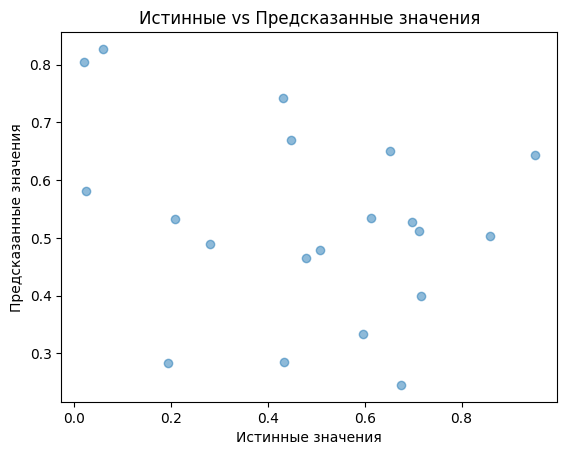

In [29]:
from sklearn.ensemble import GradientBoostingRegressor

model = GradientBoostingRegressor()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(f"R2 на тестовой выборке для градиентного бустинга: {r2_score(y_test, y_pred)}")

import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel('Истинные значения')
plt.ylabel('Предсказанные значения')
plt.title('Истинные vs Предсказанные значения')
plt.show()

R2 на тестовой выборке для линейной регрессии: -0.38579438610923833


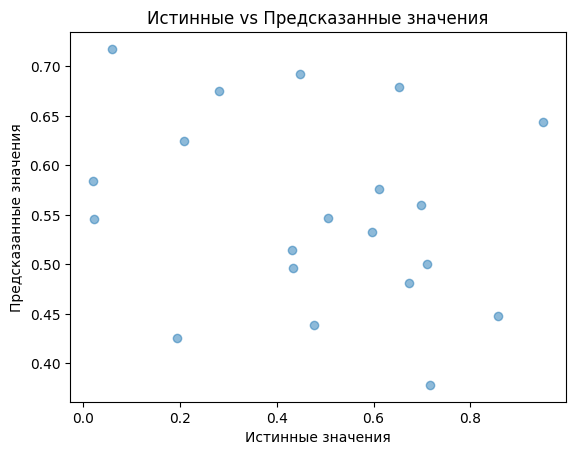

In [30]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(f"R2 на тестовой выборке для линейной регрессии: {r2_score(y_test, y_pred)}")

import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel('Истинные значения')
plt.ylabel('Предсказанные значения')
plt.title('Истинные vs Предсказанные значения')
plt.show()